In [1]:
%config IPCompleter.greedy = True

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.set_index('id', inplace=True)
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.dtypes

title     object
author    object
text      object
label      int64
dtype: object

In [7]:
df.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df = df[df['title'].notna()]
df.isna().sum()

title        0
author    1957
text        39
label        0
dtype: int64

In [9]:
df = df[df['text'].notna()]
df.isna().sum()

title        0
author    1918
text         0
label        0
dtype: int64

## Text pre-processing

In [10]:
def decontracted(phrase):
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re'", "are", phrase)
    phrase = re.sub(r"\'s", "is", phrase)
    phrase = re.sub(r"she’d", "she had", phrase)
    phrase = re.sub(r"They’d", "They would", phrase)
    phrase = re.sub(r"\'ll", "will", phrase)
    phrase = re.sub(r"\'ve", "have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [12]:
from tqdm import tqdm
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()
preprocessed_title = []
for sentance in tqdm(df['title'].values):
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_title.append(sentance.strip())

100%|██████████| 20203/20203 [00:10<00:00, 2014.56it/s]


In [13]:
preprocessed_text = []
for sentance in tqdm(df['text'].values):
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

100%|██████████| 20203/20203 [08:05<00:00, 41.62it/s]


In [14]:
final = df.copy()
final.shape

(20203, 4)

In [15]:
final['preprocessed_title'] = preprocessed_title
final['preprocessed_text'] = preprocessed_text
final.head()

,title,author,text,label,preprocessed_title,preprocessed_text
id,,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire,truth might get fire octob tension intellig an...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...


In [16]:
final.drop(['title','author','text'], axis =1, inplace=True)
final.head()

,label,preprocessed_title,preprocessed_text
id,,,
0,1,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...
1,0,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...
2,1,truth might get fire,truth might get fire octob tension intellig an...
3,1,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...
4,1,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...


In [17]:
final.label.value_counts()

0    10387
1     9816
Name: label, dtype: int64

In [18]:
final_unreliable = final[final['label']==1]
final_unreliable.head()

,label,preprocessed_title,preprocessed_text
id,,,
0,1,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...
2,1,truth might get fire,truth might get fire octob tension intellig an...
3,1,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...
4,1,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...
6,1,life life luxuri elton john favorit shark pict...,ever wonder britain icon pop pianist get long ...


In [19]:
final_reliable = final[final['label']==0]
final_reliable.head()

,label,preprocessed_title,preprocessed_text
id,,,
1,0,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...
5,0,jacki mason hollywood would love trump bomb no...,tri time jacki mason voic reason week exclus c...
7,0,beno hamon win french socialist parti presiden...,pari franc chose idealist tradit candid sunday...
8,0,excerpt draft script donald trump q ampa black...,donald j trump schedul make highli anticip vis...
9,0,back channel plan ukrain russia courtesi trump...,week michael flynn resign nation secur advis s...


In [20]:
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words("english")
STOP_WORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## WordCloud for title of unreliable data

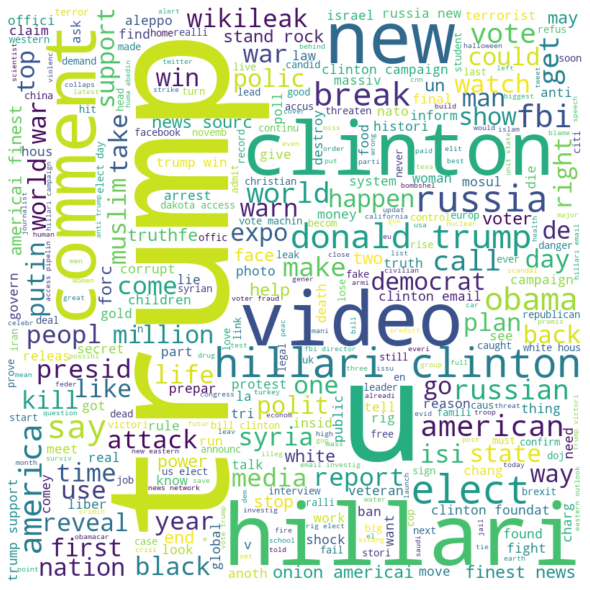

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ''
for val in final_unreliable['preprocessed_title']:
    val = str(val)
    tokens = val.split()
    words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=len(words),
                stopwords=STOP_WORDS,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## WordCloud for title of reliable data

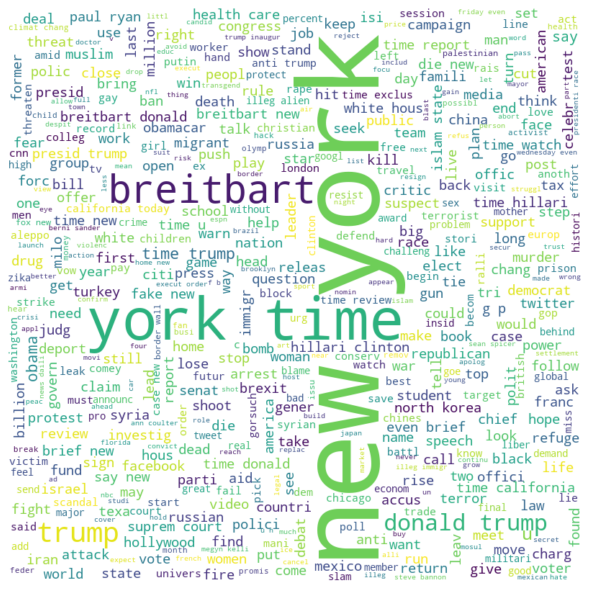

In [22]:
words = ''
for val in final_reliable['preprocessed_title']:
    val = str(val)
    tokens = val.split()
    words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=len(words),
                stopwords=STOP_WORDS,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## WordCloud for text of unreliable data

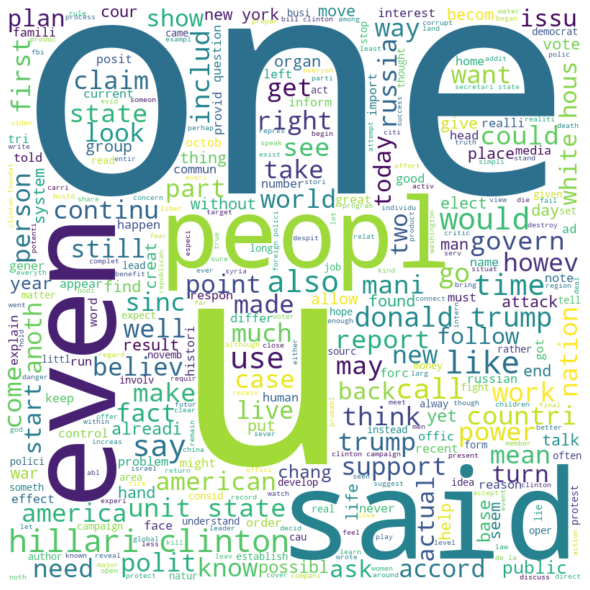

In [24]:
words = ''
for val in final_unreliable['preprocessed_text']:
    val = str(val)
    tokens = val.split()
    words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=len(words),
                stopwords=STOP_WORDS,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## WordCloud for text of reliable data

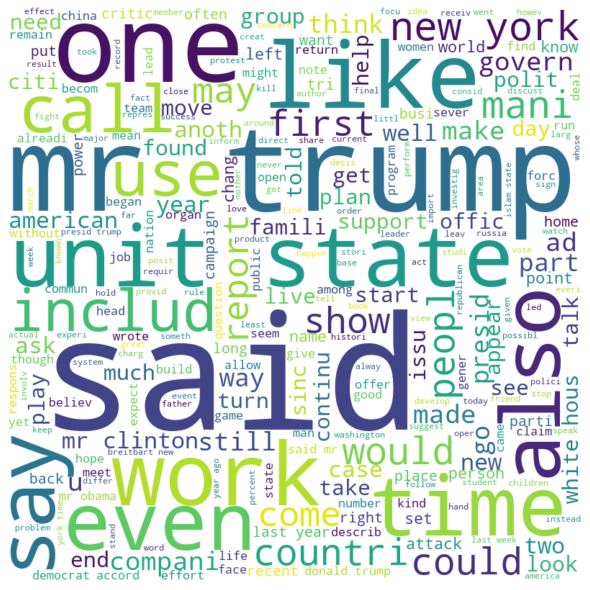

In [25]:
words = ''
for val in final_reliable['preprocessed_text']:
    val = str(val)
    tokens = val.split()
    words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=len(words),
                stopwords=STOP_WORDS,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [28]:
X = final['preprocessed_title']
X.shape

(20203,)

In [29]:
y = final['label']
y.shape

(20203,)

## Preparing train and test data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(15152,)


(5051,)

## Bag of words

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
counts = CountVectorizer(ngram_range=(1, 3))
X_train_counts_BOW = counts.fit_transform(X_train)
X_test_counts_BOW = counts.transform(X_test)

In [47]:
counts.get_feature_names()

['aa',
 'aa ball',
 'aaa',
 'aaa safeti',
 'aaa safeti foundat',
 'aap',
 'aap punjab',
 'aap punjab cm',
 'aap tata',
 'aap tata son',
 'aaron',
 'aaron hernandez',
 'aaron hernandez alleg',
 'aaron hernandez bodi',
 'aaron hernandez doubl',
 'aaron krickstein',
 'aaron krickstein report',
 'aaron perski',
 'aaron perski fire',
 'ab',
 'ab boom',
 'ab boom time',
 'ab ili',
 'ab ili kilerind',
 'ab morgen',
 'ab morgen endlich',
 'abandon',
 'abandon breitbart',
 'abandon british',
 'abandon british wwi',
 'abandon desert',
 'abandon desert call',
 'abandon donald',
 'abandon donald trump',
 'abandon effort',
 'abandon effort buy',
 'abandon effort combin',
 'abandon hillari',
 'abandon hillari except',
 'abandon kurd',
 'abandon kurd erdogani',
 'abandon new',
 'abandon new jersey',
 'abandon new york',
 'abandon tpp',
 'abandon tpp ttip',
 'abandon tradit',
 'abandon tradit famili',
 'abandon tran',
 'abandon tran pacif',
 'abandon trump',
 'abandon ukrainei',
 'abandon ukrainei ant

In [40]:
X_train_counts_BOW.shape

(15152, 177576)

In [41]:
X_test_counts_BOW.shape

(5051, 177576)

## Confusion matrix

In [48]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB

accuracy:   0.897
Confusion matrix, without normalization


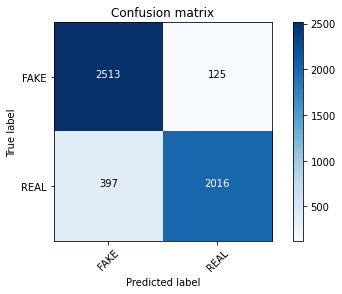

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
classifier=MultinomialNB()
classifier.fit(X_train_counts_BOW, y_train)
pred = classifier.predict(X_test_counts_BOW)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Hyperparameter tuning

In [56]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train_counts_BOW,y_train)
    y_pred=sub_classifier.predict(X_test_counts_BOW)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
        previous_score = score
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\gnrsr\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8707186695703821
Alpha: 0.1, Score : 0.9006137398534944
Alpha: 0.2, Score : 0.9049693130073253
Alpha: 0.30000000000000004, Score : 0.9035834488220155
Alpha: 0.4, Score : 0.9029895070283113
Alpha: 0.5, Score : 0.9025935458325084
Alpha: 0.6000000000000001, Score : 0.9016036428430014
Alpha: 0.7000000000000001, Score : 0.8996238368639873
Alpha: 0.8, Score : 0.8988319144723818
Alpha: 0.9, Score : 0.8980399920807761


accuracy:   0.905
Confusion matrix, without normalization


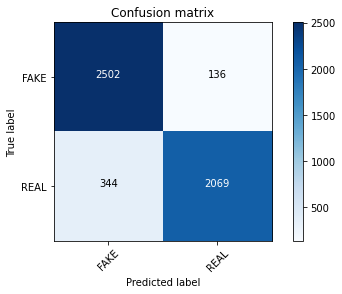

In [57]:
classifier.fit(X_train_counts_BOW, y_train)
pred = classifier.predict(X_test_counts_BOW)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## TF-IDF

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1, 3))
X_train_tf_idf = tf_idf.fit_transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)

In [73]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train_tf_idf,y_train)
    y_pred=sub_classifier.predict(X_test_tf_idf)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
        previous_score = score
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\gnrsr\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8473569590180162
Alpha: 0.1, Score : 0.8845773114234805
Alpha: 0.2, Score : 0.8861611562066918
Alpha: 0.30000000000000004, Score : 0.8849732726192833
Alpha: 0.4, Score : 0.8825975054444665
Alpha: 0.5, Score : 0.8820035636507623
Alpha: 0.6000000000000001, Score : 0.8827954860423678
Alpha: 0.7000000000000001, Score : 0.8831914472381707
Alpha: 0.8, Score : 0.8825975054444665
Alpha: 0.9, Score : 0.880419718867551


accuracy:   0.886
Confusion matrix, without normalization


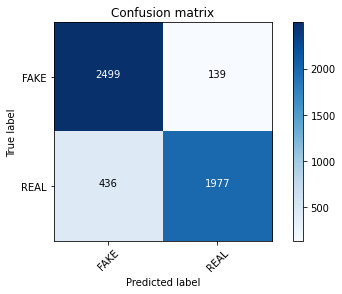

In [74]:
classifier.fit(X_train_tf_idf, y_train)
pred = classifier.predict(X_test_tf_idf)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Classification using LSTM

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import one_hot

In [100]:
X

id
0        hous dem aid even see comey letter jason chaff...
1          flynn hillari clinton big woman campu breitbart
2                                     truth might get fire
3                 civilian kill singl us airstrik identifi
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795            rapper trump poster child white supremaci
20796      n f l playoff schedul matchup odd new york time
20797    maci said receiv takeov approach hudson bay ne...
20798             nato russia hold parallel exercis balkan
20799                                            keep aliv
Name: preprocessed_title, Length: 20203, dtype: object

In [101]:
list1 = []
for i in X:
    j = i.split(" ")
    for m in j:
        list1.append(m)
len(set(list1))

14803

In [102]:
voc_size=14803

## One hot representation

In [103]:
onehot_repr = [one_hot(words, voc_size) for words in X]
onehot_repr

[[9288, 13594, 11485, 2468, 12209, 1802, 3694, 5029, 6759, 6105],
 [481, 2240, 2637, 7796, 2285, 1619, 7244],
 [12020, 12109, 13134, 13981],
 [8955, 13153, 217, 9873, 11991, 3781],
 [9100, 2285, 4450, 10291, 11356, 7348, 2285, 4311, 13748, 4033],
 [10458,
  6902,
  12678,
  4374,
  2091,
  6524,
  11999,
  11716,
  3772,
  14782,
  3571,
  9380,
  3287,
  118,
  7244],
 [5721, 5721, 7406, 2214, 10136, 990, 2414, 9330, 1947, 7728, 795, 13078],
 [4791, 9676, 4389, 4115, 6931, 2841, 12134, 11127, 1581, 1833, 12504],
 [6827,
  4098,
  398,
  13125,
  6524,
  12262,
  4620,
  12652,
  9361,
  7193,
  1581,
  1833,
  12504],
 [9281, 5393, 7511, 7849, 8527, 5305, 6524, 6044, 1581, 1833, 12504],
 [2855, 13093, 555, 1539, 2206, 12930, 11649, 9499, 6524, 5039],
 [10992, 11455, 13994, 3263, 12142, 1275, 1998, 5819],
 [1723, 6514, 9171, 2987, 9961, 8176, 1100, 5888, 10533, 9803, 3086],
 [9873, 9013, 12209, 6559, 12930, 6524, 8527],
 [8055, 10371, 2688, 1106, 7696, 1436, 11239, 6601, 5335],
 [6401,

In [105]:
max(len(i) for i in onehot_repr)

47

In [108]:
sent_length=47
embedded_docs = sequence.pad_sequences(onehot_repr, maxlen=sent_length)
print(embedded_docs)
embedded_docs[0]

[[    0     0     0 ...  5029  6759  6105]
 [    0     0     0 ...  2285  1619  7244]
 [    0     0     0 ... 12109 13134 13981]
 ...
 [    0     0     0 ...  1581  1833 12504]
 [    0     0     0 ...  4749  9068  2834]
 [    0     0     0 ...     0 10154  3533]]


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  9288, 13594, 11485,  2468, 12209,  1802,  3694,  5029,
        6759,  6105])

In [109]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_length, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 47, 32)            473696    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 526,997
Trainable params: 526,997
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.30, random_state=11)

In [120]:
model.fit(X_train, y_train, epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
221/221 [==============================] - ETA: 0s - loss: 5.0669e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.4671e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.0460e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.0926e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.0312e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.2061e-05 - accuracy: 1.00 - ETA: 8s - loss: 5.0209e-05 - accuracy: 1.00 - ETA: 8s - loss: 4.9199e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.0594e-04 - accuracy: 1.00 - ETA: 8s - loss: 1.0057e-04 - accuracy: 1.00 - ETA: 8s - loss: 9.6932e-05 - accuracy: 1.00 - ETA: 8s - loss: 8.7500e-05 - accuracy: 1.00 - ETA: 8s - loss: 8.0360e-05 - accuracy: 1.00 - ETA: 8s - loss: 8.1835e-05 - accuracy: 1.00 - ETA: 8s - loss: 7.6890e-05 - accuracy: 1.00 - ETA: 8s - loss: 7.4781e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.2450e-04 - accuracy: 1.00 - ETA: 8s - loss: 1.2028e-04 - accuracy: 1.00 - ETA: 8s - loss: 1.1664e-04 - accuracy: 1.00 - ETA: 8s - loss: 1.7739e-04 - accuracy: 1.00 - ETA: 8s - loss: 1.7511e-04

190/221 [========================>.....] - ETA: 0s - loss: 0.0047 - accuracy: 1.00 - ETA: 5s - loss: 0.0024 - accuracy: 1.00 - ETA: 7s - loss: 0.0016 - accuracy: 1.00 - ETA: 8s - loss: 0.0012 - accuracy: 1.00 - ETA: 9s - loss: 9.5776e-04 - accuracy: 1.00 - ETA: 9s - loss: 8.0868e-04 - accuracy: 1.00 - ETA: 9s - loss: 7.0095e-04 - accuracy: 1.00 - ETA: 10s - loss: 7.3119e-04 - accuracy: 1.000 - ETA: 10s - loss: 6.9798e-04 - accuracy: 1.000 - ETA: 10s - loss: 6.3148e-04 - accuracy: 1.000 - ETA: 10s - loss: 5.7497e-04 - accuracy: 1.000 - ETA: 10s - loss: 0.0051 - accuracy: 0.9987    - ETA: 10s - loss: 0.0047 - accuracy: 0.998 - ETA: 10s - loss: 0.0044 - accuracy: 0.998 - ETA: 10s - loss: 0.0041 - accuracy: 0.999 - ETA: 11s - loss: 0.0039 - accuracy: 0.999 - ETA: 11s - loss: 0.0037 - accuracy: 0.999 - ETA: 11s - loss: 0.0035 - accuracy: 0.999 - ETA: 11s - loss: 0.0033 - accuracy: 0.999 - ETA: 11s - loss: 0.0032 - accuracy: 0.999 - ETA: 11s - loss: 0.0031 - accuracy: 0.999 - ETA: 11s - loss

221/221 [==============================] - ETA: 1s - loss: 9.3337e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.3392e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.2918e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.2461e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.2047e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.1586e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.1287e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.0838e-04 - accuracy: 0.99 - ETA: 1s - loss: 9.0398e-04 - accuracy: 0.99 - ETA: 1s - loss: 8.9956e-04 - accuracy: 0.99 - ETA: 1s - loss: 8.9529e-04 - accuracy: 0.99 - ETA: 1s - loss: 8.9120e-04 - accuracy: 0.99 - ETA: 1s - loss: 8.8696e-04 - accuracy: 0.99 - ETA: 1s - loss: 8.8285e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.7881e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.7462e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.7045e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.6658e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.6304e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.5907e-04 - accuracy: 0.99 - ETA: 0s - loss: 8.5506e-04 - accuracy

179/221 [=======================>......] - ETA: 0s - loss: 3.9924e-05 - accuracy: 1.00 - ETA: 6s - loss: 4.2669e-05 - accuracy: 1.00 - ETA: 7s - loss: 3.7420e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.9008e-05 - accuracy: 1.00 - ETA: 9s - loss: 0.0046 - accuracy: 0.9969   - ETA: 9s - loss: 0.0038 - accuracy: 0.99 - ETA: 10s - loss: 0.0033 - accuracy: 0.997 - ETA: 10s - loss: 0.0029 - accuracy: 0.998 - ETA: 10s - loss: 0.0026 - accuracy: 0.998 - ETA: 10s - loss: 0.0023 - accuracy: 0.998 - ETA: 10s - loss: 0.0021 - accuracy: 0.998 - ETA: 10s - loss: 0.0019 - accuracy: 0.998 - ETA: 11s - loss: 0.0018 - accuracy: 0.998 - ETA: 11s - loss: 0.0017 - accuracy: 0.998 - ETA: 11s - loss: 0.0016 - accuracy: 0.999 - ETA: 10s - loss: 0.0015 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0013 - accuracy: 0.999 - ETA: 10s - loss: 0.0012 - accuracy: 0.999 - ETA: 10s - loss: 0.0012 - accuracy: 0.999 - ETA: 10s - loss: 0.0011 - accuracy: 0.999 - ETA: 10s - loss: 0.0011 -

221/221 [==============================] - ETA: 2s - loss: 5.5174e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.5023e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4727e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4439e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4156e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.3878e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.3612e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.3345e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.3220e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.3195e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.2923e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.2658e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.2395e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.2125e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.2148e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.1884e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.1656e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.1401e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.1161e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.0964e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.0716e-04 - accuracy

177/221 [=======================>......] - ETA: 0s - loss: 5.7170e-05 - accuracy: 1.00 - ETA: 6s - loss: 3.6158e-05 - accuracy: 1.00 - ETA: 8s - loss: 5.2751e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.8310e-05 - accuracy: 1.00 - ETA: 10s - loss: 4.9687e-05 - accuracy: 1.000 - ETA: 10s - loss: 5.3258e-05 - accuracy: 1.000 - ETA: 10s - loss: 5.3642e-05 - accuracy: 1.000 - ETA: 10s - loss: 6.1827e-05 - accuracy: 1.000 - ETA: 10s - loss: 7.2354e-05 - accuracy: 1.000 - ETA: 10s - loss: 7.8924e-05 - accuracy: 1.000 - ETA: 11s - loss: 7.2647e-05 - accuracy: 1.000 - ETA: 11s - loss: 6.7930e-05 - accuracy: 1.000 - ETA: 11s - loss: 6.3432e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.9315e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.6399e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.4214e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.1484e-05 - accuracy: 1.000 - ETA: 11s - loss: 4.9726e-05 - accuracy: 1.000 - ETA: 11s - loss: 4.8740e-05 - accuracy: 1.000 - ETA: 11s - loss: 4.6665e-05 - accuracy: 1.000 - ETA: 

221/221 [==============================] - ETA: 2s - loss: 3.7396e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.1390e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.1234e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.1023e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0825e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0616e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0517e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0303e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0281e-04 - accuracy: 0.99 - ETA: 1s - loss: 4.0390e-04 - accuracy: 0.99 - ETA: 1s - loss: 4.0181e-04 - accuracy: 0.99 - ETA: 1s - loss: 4.0050e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9845e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9642e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9444e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9248e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9061e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.8877e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.8693e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.8557e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.8369e-04 - accuracy

176/221 [======================>.......] - ETA: 0s - loss: 3.5344e-05 - accuracy: 1.00 - ETA: 6s - loss: 2.7575e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.5932e-05 - accuracy: 1.00 - ETA: 9s - loss: 2.1958e-05 - accuracy: 1.00 - ETA: 10s - loss: 2.2721e-05 - accuracy: 1.000 - ETA: 10s - loss: 1.9769e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.5877e-05 - accuracy: 1.000 - ETA: 10s - loss: 7.4004e-05 - accuracy: 1.000 - ETA: 10s - loss: 6.6369e-05 - accuracy: 1.000 - ETA: 11s - loss: 6.4858e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.9541e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.5270e-05 - accuracy: 1.000 - ETA: 11s - loss: 6.8330e-05 - accuracy: 1.000 - ETA: 10s - loss: 6.3779e-05 - accuracy: 1.000 - ETA: 11s - loss: 6.0283e-05 - accuracy: 1.000 - ETA: 11s - loss: 5.7214e-05 - accuracy: 1.000 - ETA: 10s - loss: 5.4187e-05 - accuracy: 1.000 - ETA: 10s - loss: 6.5366e-05 - accuracy: 1.000 - ETA: 10s - loss: 6.6124e-05 - accuracy: 1.000 - ETA: 10s - loss: 6.3074e-05 - accuracy: 1.000 - ETA: 

221/221 [==============================] - ETA: 2s - loss: 1.3706e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3641e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3798e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3790e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3720e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3653e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3589e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3531e-04 - accuracy: 1.00 - ETA: 2s - loss: 1.3556e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5289e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5303e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5226e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5151e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5091e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5042e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5000e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5955e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5876e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5800e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5730e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.5653e-04 - accuracy

176/221 [======================>.......] - ETA: 0s - loss: 7.7607e-06 - accuracy: 1.00 - ETA: 5s - loss: 9.2679e-05 - accuracy: 1.00 - ETA: 7s - loss: 8.7128e-05 - accuracy: 1.00 - ETA: 8s - loss: 6.8958e-05 - accuracy: 1.00 - ETA: 9s - loss: 5.5503e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.7861e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.1658e-05 - accuracy: 1.00 - ETA: 10s - loss: 3.7561e-05 - accuracy: 1.000 - ETA: 10s - loss: 3.4221e-05 - accuracy: 1.000 - ETA: 10s - loss: 3.1895e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.9725e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.9957e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.8557e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.7119e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.6407e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.6182e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.6247e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.7041e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.5855e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.6632e-05 - accuracy: 1.000 - ETA: 10s - 

221/221 [==============================] - ETA: 2s - loss: 4.1292e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.1070e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0846e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0623e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0553e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0390e-04 - accuracy: 0.99 - ETA: 2s - loss: 4.0174e-04 - accuracy: 0.99 - ETA: 2s - loss: 3.9961e-04 - accuracy: 0.99 - ETA: 2s - loss: 3.9755e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9572e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9363e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.9161e-04 - accuracy: 0.99 - ETA: 1s - loss: 3.8960e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.6682e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.6403e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.6125e-04 - accuracy: 0.99 - ETA: 1s - loss: 6.0077e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9780e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9477e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9188e-04 - accuracy: 0.99 - ETA: 1s - loss: 6.0011e-04 - accuracy

191/221 [========================>.....] - ETA: 0s - loss: 4.5254e-05 - accuracy: 1.00 - ETA: 6s - loss: 2.5113e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.0956e-05 - accuracy: 1.00 - ETA: 10s - loss: 4.7386e-05 - accuracy: 1.000 - ETA: 10s - loss: 7.2358e-05 - accuracy: 1.000 - ETA: 11s - loss: 8.5116e-05 - accuracy: 1.000 - ETA: 11s - loss: 8.0587e-05 - accuracy: 1.000 - ETA: 11s - loss: 1.4477e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.2993e-04 - accuracy: 1.000 - ETA: 11s - loss: 7.0315e-04 - accuracy: 1.000 - ETA: 11s - loss: 6.4206e-04 - accuracy: 1.000 - ETA: 11s - loss: 5.9409e-04 - accuracy: 1.000 - ETA: 11s - loss: 5.6018e-04 - accuracy: 1.000 - ETA: 12s - loss: 5.2303e-04 - accuracy: 1.000 - ETA: 11s - loss: 4.9162e-04 - accuracy: 1.000 - ETA: 11s - loss: 4.3640e-04 - accuracy: 1.000 - ETA: 11s - loss: 4.1576e-04 - accuracy: 1.000 - ETA: 11s - loss: 3.9949e-04 - accuracy: 1.000 - ETA: 11s - loss: 3.7996e-04 - accuracy: 1.000 - ETA: 11s - loss: 3.6257e-04 - accuracy: 1.000 - ETA

221/221 [==============================] - ETA: 1s - loss: 0.0015 - accuracy: 0.99 - ETA: 1s - loss: 0.0015 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0014 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0015 - accuracy

179/221 [=======================>......] - ETA: 0s - loss: 1.5727e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.3534e-04 - accuracy: 1.00 - ETA: 7s - loss: 4.4058e-04 - accuracy: 1.00 - ETA: 8s - loss: 0.0034 - accuracy: 1.0000   - ETA: 9s - loss: 0.0027 - accuracy: 1.00 - ETA: 9s - loss: 0.0024 - accuracy: 1.00 - ETA: 9s - loss: 0.0020 - accuracy: 1.00 - ETA: 9s - loss: 0.0018 - accuracy: 1.00 - ETA: 10s - loss: 0.0016 - accuracy: 1.000 - ETA: 10s - loss: 0.0014 - accuracy: 1.000 - ETA: 10s - loss: 0.0013 - accuracy: 1.000 - ETA: 10s - loss: 0.0012 - accuracy: 1.000 - ETA: 10s - loss: 0.0011 - accuracy: 1.000 - ETA: 10s - loss: 0.0011 - accuracy: 1.000 - ETA: 10s - loss: 0.0010 - accuracy: 1.000 - ETA: 10s - loss: 0.0015 - accuracy: 1.000 - ETA: 10s - loss: 0.0014 - accuracy: 1.000 - ETA: 10s - loss: 0.0013 - accuracy: 1.000 - ETA: 10s - loss: 0.0013 - accuracy: 1.000 - ETA: 10s - loss: 0.0012 - accuracy: 1.000 - ETA: 10s - loss: 0.0012 - accuracy: 1.000 - ETA: 10s - loss: 0.0011 - accurac

221/221 [==============================] - ETA: 2s - loss: 5.8859e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.8551e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.8238e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.7939e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.7639e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.8735e-04 - accuracy: 0.99 - ETA: 1s - loss: 6.0027e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9735e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9523e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9248e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9209e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9133e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.9156e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.8860e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.8623e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.8365e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.8180e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.7913e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.7633e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.7386e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.7527e-04 - accuracy

176/221 [======================>.......] - ETA: 0s - loss: 2.6360e-05 - accuracy: 1.00 - ETA: 5s - loss: 9.0172e-05 - accuracy: 1.00 - ETA: 7s - loss: 6.2198e-05 - accuracy: 1.00 - ETA: 8s - loss: 5.4668e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.7667e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.5424e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.9471e-05 - accuracy: 1.00 - ETA: 10s - loss: 4.4399e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.4025e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.6419e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.6438e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.6666e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.6645e-05 - accuracy: 1.000 - ETA: 10s - loss: 5.0461e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.9175e-05 - accuracy: 1.000 - ETA: 10s - loss: 4.8857e-05 - accuracy: 1.000 - ETA: 10s - loss: 7.2987e-05 - accuracy: 1.000 - ETA: 10s - loss: 1.5726e-04 - accuracy: 1.000 - ETA: 10s - loss: 1.7932e-04 - accuracy: 1.000 - ETA: 10s - loss: 1.7395e-04 - accuracy: 1.000 - ETA: 10s - 

221/221 [==============================] - ETA: 2s - loss: 5.5021e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4719e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4424e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4627e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4373e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4089e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.3799e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.3560e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4341e-04 - accuracy: 0.99 - ETA: 2s - loss: 5.4387e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.5558e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.5477e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.5650e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.5362e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.5091e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.4833e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.4560e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.4283e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.4048e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.3792e-04 - accuracy: 0.99 - ETA: 1s - loss: 5.3535e-04 - accuracy

190/221 [========================>.....] - ETA: 0s - loss: 1.2616e-05 - accuracy: 1.00 - ETA: 6s - loss: 8.0219e-05 - accuracy: 1.00 - ETA: 8s - loss: 7.2614e-05 - accuracy: 1.00 - ETA: 9s - loss: 8.8855e-05 - accuracy: 1.00 - ETA: 10s - loss: 7.5289e-05 - accuracy: 1.000 - ETA: 10s - loss: 7.5847e-05 - accuracy: 1.000 - ETA: 10s - loss: 9.7856e-05 - accuracy: 1.000 - ETA: 10s - loss: 9.1785e-05 - accuracy: 1.000 - ETA: 10s - loss: 8.3559e-05 - accuracy: 1.000 - ETA: 11s - loss: 1.8436e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.9774e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.8636e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.7280e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.6561e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.5581e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.4655e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.3887e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.3189e-04 - accuracy: 1.000 - ETA: 10s - loss: 1.2552e-04 - accuracy: 1.000 - ETA: 10s - loss: 1.2002e-04 - accuracy: 1.000 - ETA: 

221/221 [==============================] - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0021 - accuracy: 0.99 - ETA: 1s - loss: 0.0020 - accuracy: 0.99 - ETA: 1s - loss: 0.0020 - accuracy: 0.99 - ETA: 1s - loss: 0.0020 - accuracy: 0.99 - ETA: 1s - loss: 0.0020 - accuracy: 0.99 - ETA: 1s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - ETA: 0s - loss: 0.0019 - accuracy: 0.99 - ETA: 0s - loss: 0.0019 - accuracy: 0.99 - ETA: 0s - loss: 0.0019 - accuracy: 0.99 - ETA: 0s - loss: 0.0019 - accuracy

In [121]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.88%


## Adding Dropout

In [122]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [124]:
model.fit(X_train, y_train, epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10


199/221 [==========================>...] - ETA: 0s - loss: 0.1483 - accuracy: 0.93 - ETA: 6s - loss: 0.1385 - accuracy: 0.92 - ETA: 8s - loss: 0.1568 - accuracy: 0.93 - ETA: 9s - loss: 0.1477 - accuracy: 0.94 - ETA: 10s - loss: 0.1678 - accuracy: 0.934 - ETA: 10s - loss: 0.1569 - accuracy: 0.945 - ETA: 10s - loss: 0.1570 - accuracy: 0.946 - ETA: 11s - loss: 0.1491 - accuracy: 0.953 - ETA: 11s - loss: 0.1471 - accuracy: 0.954 - ETA: 11s - loss: 0.1457 - accuracy: 0.954 - ETA: 11s - loss: 0.1422 - accuracy: 0.956 - ETA: 11s - loss: 0.1500 - accuracy: 0.951 - ETA: 11s - loss: 0.1460 - accuracy: 0.953 - ETA: 11s - loss: 0.1485 - accuracy: 0.952 - ETA: 11s - loss: 0.1497 - accuracy: 0.950 - ETA: 11s - loss: 0.1485 - accuracy: 0.949 - ETA: 11s - loss: 0.1562 - accuracy: 0.943 - ETA: 11s - loss: 0.1594 - accuracy: 0.940 - ETA: 11s - loss: 0.1567 - accuracy: 0.940 - ETA: 11s - loss: 0.1543 - accuracy: 0.942 - ETA: 11s - loss: 0.1553 - accuracy: 0.942 - ETA: 11s - loss: 0.1553 - accuracy: 0.942

221/221 [==============================] - ETA: 1s - loss: 0.1429 - accuracy: 0.94 - ETA: 1s - loss: 0.1429 - accuracy: 0.94 - ETA: 1s - loss: 0.1428 - accuracy: 0.94 - ETA: 1s - loss: 0.1429 - accuracy: 0.94 - ETA: 1s - loss: 0.1432 - accuracy: 0.94 - ETA: 0s - loss: 0.1433 - accuracy: 0.94 - ETA: 0s - loss: 0.1432 - accuracy: 0.94 - ETA: 0s - loss: 0.1428 - accuracy: 0.94 - ETA: 0s - loss: 0.1430 - accuracy: 0.94 - ETA: 0s - loss: 0.1433 - accuracy: 0.94 - ETA: 0s - loss: 0.1435 - accuracy: 0.94 - ETA: 0s - loss: 0.1432 - accuracy: 0.94 - ETA: 0s - loss: 0.1434 - accuracy: 0.94 - ETA: 0s - loss: 0.1431 - accuracy: 0.94 - ETA: 0s - loss: 0.1430 - accuracy: 0.94 - ETA: 0s - loss: 0.1429 - accuracy: 0.94 - ETA: 0s - loss: 0.1429 - accuracy: 0.94 - ETA: 0s - loss: 0.1429 - accuracy: 0.94 - ETA: 0s - loss: 0.1429 - accuracy: 0.94 - ETA: 0s - loss: 0.1434 - accuracy: 0.94 - ETA: 0s - loss: 0.1435 - accuracy: 0.94 - ETA: 0s - loss: 0.1439 - accuracy: 0.94 - 13s 60ms/step - loss: 0.1439 - ac

192/221 [=========================>....] - ETA: 0s - loss: 0.1349 - accuracy: 0.93 - ETA: 6s - loss: 0.0951 - accuracy: 0.96 - ETA: 9s - loss: 0.1217 - accuracy: 0.94 - ETA: 10s - loss: 0.1212 - accuracy: 0.941 - ETA: 11s - loss: 0.1141 - accuracy: 0.950 - ETA: 11s - loss: 0.1113 - accuracy: 0.955 - ETA: 11s - loss: 0.1116 - accuracy: 0.955 - ETA: 12s - loss: 0.1063 - accuracy: 0.959 - ETA: 12s - loss: 0.1007 - accuracy: 0.961 - ETA: 12s - loss: 0.0999 - accuracy: 0.962 - ETA: 12s - loss: 0.1030 - accuracy: 0.961 - ETA: 12s - loss: 0.0999 - accuracy: 0.964 - ETA: 12s - loss: 0.0956 - accuracy: 0.967 - ETA: 12s - loss: 0.0911 - accuracy: 0.969 - ETA: 12s - loss: 0.0907 - accuracy: 0.968 - ETA: 12s - loss: 0.0898 - accuracy: 0.968 - ETA: 12s - loss: 0.0882 - accuracy: 0.969 - ETA: 12s - loss: 0.0850 - accuracy: 0.971 - ETA: 12s - loss: 0.0841 - accuracy: 0.972 - ETA: 12s - loss: 0.0822 - accuracy: 0.971 - ETA: 12s - loss: 0.0817 - accuracy: 0.972 - ETA: 12s - loss: 0.0808 - accuracy: 0.9

221/221 [==============================] - ETA: 1s - loss: 0.0833 - accuracy: 0.97 - ETA: 1s - loss: 0.0834 - accuracy: 0.97 - ETA: 1s - loss: 0.0832 - accuracy: 0.97 - ETA: 1s - loss: 0.0833 - accuracy: 0.97 - ETA: 1s - loss: 0.0832 - accuracy: 0.97 - ETA: 1s - loss: 0.0832 - accuracy: 0.97 - ETA: 1s - loss: 0.0829 - accuracy: 0.97 - ETA: 1s - loss: 0.0833 - accuracy: 0.97 - ETA: 1s - loss: 0.0833 - accuracy: 0.97 - ETA: 1s - loss: 0.0833 - accuracy: 0.97 - ETA: 1s - loss: 0.0831 - accuracy: 0.97 - ETA: 1s - loss: 0.0829 - accuracy: 0.97 - ETA: 0s - loss: 0.0828 - accuracy: 0.97 - ETA: 0s - loss: 0.0834 - accuracy: 0.97 - ETA: 0s - loss: 0.0837 - accuracy: 0.97 - ETA: 0s - loss: 0.0837 - accuracy: 0.97 - ETA: 0s - loss: 0.0834 - accuracy: 0.97 - ETA: 0s - loss: 0.0835 - accuracy: 0.97 - ETA: 0s - loss: 0.0834 - accuracy: 0.97 - ETA: 0s - loss: 0.0834 - accuracy: 0.97 - ETA: 0s - loss: 0.0835 - accuracy: 0.97 - ETA: 0s - loss: 0.0837 - accuracy: 0.97 - ETA: 0s - loss: 0.0841 - accuracy

192/221 [=========================>....] - ETA: 0s - loss: 0.1418 - accuracy: 0.95 - ETA: 6s - loss: 0.1048 - accuracy: 0.95 - ETA: 9s - loss: 0.0826 - accuracy: 0.96 - ETA: 10s - loss: 0.0694 - accuracy: 0.976 - ETA: 10s - loss: 0.0768 - accuracy: 0.968 - ETA: 10s - loss: 0.0691 - accuracy: 0.974 - ETA: 11s - loss: 0.0711 - accuracy: 0.973 - ETA: 11s - loss: 0.0656 - accuracy: 0.976 - ETA: 11s - loss: 0.0623 - accuracy: 0.979 - ETA: 11s - loss: 0.0593 - accuracy: 0.981 - ETA: 11s - loss: 0.0555 - accuracy: 0.983 - ETA: 11s - loss: 0.0540 - accuracy: 0.983 - ETA: 11s - loss: 0.0589 - accuracy: 0.980 - ETA: 11s - loss: 0.0574 - accuracy: 0.981 - ETA: 11s - loss: 0.0556 - accuracy: 0.982 - ETA: 11s - loss: 0.0559 - accuracy: 0.982 - ETA: 11s - loss: 0.0565 - accuracy: 0.982 - ETA: 11s - loss: 0.0548 - accuracy: 0.983 - ETA: 11s - loss: 0.0536 - accuracy: 0.983 - ETA: 11s - loss: 0.0518 - accuracy: 0.984 - ETA: 11s - loss: 0.0509 - accuracy: 0.985 - ETA: 11s - loss: 0.0515 - accuracy: 0.9

221/221 [==============================] - ETA: 1s - loss: 0.0501 - accuracy: 0.98 - ETA: 1s - loss: 0.0504 - accuracy: 0.98 - ETA: 1s - loss: 0.0502 - accuracy: 0.98 - ETA: 1s - loss: 0.0505 - accuracy: 0.98 - ETA: 1s - loss: 0.0503 - accuracy: 0.98 - ETA: 1s - loss: 0.0502 - accuracy: 0.98 - ETA: 1s - loss: 0.0505 - accuracy: 0.98 - ETA: 1s - loss: 0.0504 - accuracy: 0.98 - ETA: 1s - loss: 0.0505 - accuracy: 0.98 - ETA: 1s - loss: 0.0505 - accuracy: 0.98 - ETA: 1s - loss: 0.0508 - accuracy: 0.98 - ETA: 1s - loss: 0.0509 - accuracy: 0.98 - ETA: 0s - loss: 0.0510 - accuracy: 0.98 - ETA: 0s - loss: 0.0512 - accuracy: 0.98 - ETA: 0s - loss: 0.0515 - accuracy: 0.98 - ETA: 0s - loss: 0.0517 - accuracy: 0.98 - ETA: 0s - loss: 0.0516 - accuracy: 0.98 - ETA: 0s - loss: 0.0516 - accuracy: 0.98 - ETA: 0s - loss: 0.0514 - accuracy: 0.98 - ETA: 0s - loss: 0.0515 - accuracy: 0.98 - ETA: 0s - loss: 0.0514 - accuracy: 0.98 - ETA: 0s - loss: 0.0514 - accuracy: 0.98 - ETA: 0s - loss: 0.0515 - accuracy

193/221 [=========================>....] - ETA: 0s - loss: 0.0419 - accuracy: 0.98 - ETA: 5s - loss: 0.0358 - accuracy: 0.98 - ETA: 7s - loss: 0.0302 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 9s - loss: 0.0427 - accuracy: 0.98 - ETA: 9s - loss: 0.0404 - accuracy: 0.98 - ETA: 10s - loss: 0.0367 - accuracy: 0.988 - ETA: 10s - loss: 0.0336 - accuracy: 0.990 - ETA: 10s - loss: 0.0337 - accuracy: 0.989 - ETA: 10s - loss: 0.0316 - accuracy: 0.990 - ETA: 10s - loss: 0.0310 - accuracy: 0.990 - ETA: 10s - loss: 0.0291 - accuracy: 0.990 - ETA: 10s - loss: 0.0285 - accuracy: 0.990 - ETA: 10s - loss: 0.0283 - accuracy: 0.991 - ETA: 10s - loss: 0.0275 - accuracy: 0.991 - ETA: 10s - loss: 0.0326 - accuracy: 0.990 - ETA: 10s - loss: 0.0310 - accuracy: 0.990 - ETA: 10s - loss: 0.0302 - accuracy: 0.991 - ETA: 10s - loss: 0.0295 - accuracy: 0.991 - ETA: 10s - loss: 0.0282 - accuracy: 0.992 - ETA: 10s - loss: 0.0272 - accuracy: 0.992 - ETA: 10s - loss: 0.0281 - accuracy: 0.991 - E

221/221 [==============================] - ETA: 1s - loss: 0.0294 - accuracy: 0.99 - ETA: 1s - loss: 0.0295 - accuracy: 0.99 - ETA: 1s - loss: 0.0296 - accuracy: 0.99 - ETA: 1s - loss: 0.0295 - accuracy: 0.99 - ETA: 1s - loss: 0.0296 - accuracy: 0.99 - ETA: 1s - loss: 0.0300 - accuracy: 0.99 - ETA: 1s - loss: 0.0300 - accuracy: 0.99 - ETA: 1s - loss: 0.0299 - accuracy: 0.99 - ETA: 1s - loss: 0.0300 - accuracy: 0.99 - ETA: 1s - loss: 0.0301 - accuracy: 0.99 - ETA: 0s - loss: 0.0301 - accuracy: 0.99 - ETA: 0s - loss: 0.0301 - accuracy: 0.99 - ETA: 0s - loss: 0.0301 - accuracy: 0.99 - ETA: 0s - loss: 0.0301 - accuracy: 0.99 - ETA: 0s - loss: 0.0302 - accuracy: 0.99 - ETA: 0s - loss: 0.0304 - accuracy: 0.99 - ETA: 0s - loss: 0.0303 - accuracy: 0.99 - ETA: 0s - loss: 0.0304 - accuracy: 0.99 - ETA: 0s - loss: 0.0305 - accuracy: 0.99 - ETA: 0s - loss: 0.0305 - accuracy: 0.99 - ETA: 0s - loss: 0.0304 - accuracy: 0.99 - ETA: 0s - loss: 0.0304 - accuracy: 0.99 - ETA: 0s - loss: 0.0305 - accuracy

193/221 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 1.00 - ETA: 6s - loss: 0.0180 - accuracy: 0.99 - ETA: 8s - loss: 0.0131 - accuracy: 0.99 - ETA: 9s - loss: 0.0105 - accuracy: 0.99 - ETA: 9s - loss: 0.0101 - accuracy: 0.99 - ETA: 10s - loss: 0.0089 - accuracy: 0.997 - ETA: 10s - loss: 0.0097 - accuracy: 0.997 - ETA: 10s - loss: 0.0117 - accuracy: 0.996 - ETA: 10s - loss: 0.0124 - accuracy: 0.994 - ETA: 10s - loss: 0.0124 - accuracy: 0.995 - ETA: 10s - loss: 0.0159 - accuracy: 0.992 - ETA: 10s - loss: 0.0147 - accuracy: 0.993 - ETA: 11s - loss: 0.0140 - accuracy: 0.994 - ETA: 10s - loss: 0.0132 - accuracy: 0.994 - ETA: 10s - loss: 0.0131 - accuracy: 0.994 - ETA: 10s - loss: 0.0128 - accuracy: 0.995 - ETA: 10s - loss: 0.0131 - accuracy: 0.995 - ETA: 10s - loss: 0.0127 - accuracy: 0.995 - ETA: 10s - loss: 0.0126 - accuracy: 0.995 - ETA: 10s - loss: 0.0129 - accuracy: 0.996 - ETA: 10s - loss: 0.0137 - accuracy: 0.996 - ETA: 10s - loss: 0.0139 - accuracy: 0.996 -

221/221 [==============================] - ETA: 1s - loss: 0.0181 - accuracy: 0.99 - ETA: 1s - loss: 0.0181 - accuracy: 0.99 - ETA: 1s - loss: 0.0181 - accuracy: 0.99 - ETA: 1s - loss: 0.0180 - accuracy: 0.99 - ETA: 1s - loss: 0.0180 - accuracy: 0.99 - ETA: 1s - loss: 0.0180 - accuracy: 0.99 - ETA: 1s - loss: 0.0180 - accuracy: 0.99 - ETA: 1s - loss: 0.0179 - accuracy: 0.99 - ETA: 1s - loss: 0.0179 - accuracy: 0.99 - ETA: 1s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0177 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0177 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy

193/221 [=========================>....] - ETA: 0s - loss: 0.0031 - accuracy: 1.00 - ETA: 5s - loss: 0.0029 - accuracy: 1.00 - ETA: 7s - loss: 0.0023 - accuracy: 1.00 - ETA: 8s - loss: 0.0020 - accuracy: 1.00 - ETA: 9s - loss: 0.0022 - accuracy: 1.00 - ETA: 9s - loss: 0.0024 - accuracy: 1.00 - ETA: 9s - loss: 0.0028 - accuracy: 1.00 - ETA: 10s - loss: 0.0033 - accuracy: 1.000 - ETA: 10s - loss: 0.0031 - accuracy: 1.000 - ETA: 10s - loss: 0.0041 - accuracy: 1.000 - ETA: 10s - loss: 0.0037 - accuracy: 1.000 - ETA: 10s - loss: 0.0043 - accuracy: 1.000 - ETA: 10s - loss: 0.0040 - accuracy: 1.000 - ETA: 10s - loss: 0.0042 - accuracy: 1.000 - ETA: 10s - loss: 0.0045 - accuracy: 1.000 - ETA: 10s - loss: 0.0044 - accuracy: 1.000 - ETA: 10s - loss: 0.0044 - accuracy: 1.000 - ETA: 10s - loss: 0.0043 - accuracy: 1.000 - ETA: 10s - loss: 0.0043 - accuracy: 1.000 - ETA: 10s - loss: 0.0043 - accuracy: 1.000 - ETA: 10s - loss: 0.0041 - accuracy: 1.000 - ETA: 10s - loss: 0.0054 - accuracy: 0.999 - ETA

221/221 [==============================] - ETA: 1s - loss: 0.0115 - accuracy: 0.99 - ETA: 1s - loss: 0.0115 - accuracy: 0.99 - ETA: 1s - loss: 0.0114 - accuracy: 0.99 - ETA: 1s - loss: 0.0114 - accuracy: 0.99 - ETA: 1s - loss: 0.0113 - accuracy: 0.99 - ETA: 1s - loss: 0.0114 - accuracy: 0.99 - ETA: 1s - loss: 0.0114 - accuracy: 0.99 - ETA: 1s - loss: 0.0113 - accuracy: 0.99 - ETA: 1s - loss: 0.0115 - accuracy: 0.99 - ETA: 1s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0.0114 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy: 0.99 - ETA: 0s - loss: 0.0122 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy

192/221 [=========================>....] - ETA: 0s - loss: 0.0108 - accuracy: 1.00 - ETA: 6s - loss: 0.0064 - accuracy: 1.00 - ETA: 9s - loss: 0.0059 - accuracy: 1.00 - ETA: 10s - loss: 0.0072 - accuracy: 1.000 - ETA: 11s - loss: 0.0068 - accuracy: 1.000 - ETA: 11s - loss: 0.0063 - accuracy: 1.000 - ETA: 11s - loss: 0.0072 - accuracy: 1.000 - ETA: 11s - loss: 0.0083 - accuracy: 0.998 - ETA: 11s - loss: 0.0083 - accuracy: 0.998 - ETA: 12s - loss: 0.0084 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0080 - accuracy: 0.998 - ETA: 12s - loss: 0.0131 - accuracy: 0.997 - ETA: 12s - loss: 0.0127 - accuracy: 0.997 - ETA: 12s - loss: 0.0120 - accuracy: 0.997 - ETA: 12s - loss: 0.0114 - accuracy: 0.998 - ETA: 12s - loss: 0.0112 - accuracy: 0.998 - ETA: 12s - loss: 0.0110 - accuracy: 0.998 - ETA: 12s - loss: 0.0106 - accuracy: 0.998 - ETA: 12s - loss: 0.0105 - accuracy: 0.998 - ETA: 11s - loss: 0.0101 - accuracy: 0.998 - ETA: 11s - loss: 0.0104 - accuracy: 0.9

221/221 [==============================] - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0087 - accuracy: 0.99 - ETA: 1s - loss: 0.0088 - accuracy: 0.99 - ETA: 1s - loss: 0.0088 - accuracy: 0.99 - ETA: 1s - loss: 0.0088 - accuracy: 0.99 - ETA: 1s - loss: 0.0088 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy

192/221 [=========================>....] - ETA: 0s - loss: 0.0098 - accuracy: 1.00 - ETA: 6s - loss: 0.0057 - accuracy: 1.00 - ETA: 7s - loss: 0.0053 - accuracy: 1.00 - ETA: 8s - loss: 0.0045 - accuracy: 1.00 - ETA: 9s - loss: 0.0128 - accuracy: 0.99 - ETA: 9s - loss: 0.0109 - accuracy: 0.99 - ETA: 10s - loss: 0.0133 - accuracy: 0.995 - ETA: 10s - loss: 0.0118 - accuracy: 0.996 - ETA: 10s - loss: 0.0106 - accuracy: 0.996 - ETA: 11s - loss: 0.0101 - accuracy: 0.996 - ETA: 11s - loss: 0.0092 - accuracy: 0.997 - ETA: 11s - loss: 0.0089 - accuracy: 0.997 - ETA: 11s - loss: 0.0087 - accuracy: 0.997 - ETA: 11s - loss: 0.0081 - accuracy: 0.997 - ETA: 11s - loss: 0.0078 - accuracy: 0.997 - ETA: 11s - loss: 0.0076 - accuracy: 0.998 - ETA: 11s - loss: 0.0079 - accuracy: 0.997 - ETA: 11s - loss: 0.0075 - accuracy: 0.997 - ETA: 11s - loss: 0.0116 - accuracy: 0.996 - ETA: 11s - loss: 0.0111 - accuracy: 0.996 - ETA: 11s - loss: 0.0107 - accuracy: 0.997 - ETA: 11s - loss: 0.0103 - accuracy: 0.997 - E

221/221 [==============================] - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 1s - loss: 0.0068 - accuracy: 0.99 - ETA: 1s - loss: 0.0068 - accuracy: 0.99 - ETA: 1s - loss: 0.0068 - accuracy: 0.99 - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 1s - loss: 0.0068 - accuracy: 0.99 - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 1s - loss: 0.0069 - accuracy: 0.99 - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0071 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy

192/221 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - ETA: 6s - loss: 0.0018 - accuracy: 1.00 - ETA: 8s - loss: 0.0014 - accuracy: 1.00 - ETA: 9s - loss: 0.0011 - accuracy: 1.00 - ETA: 10s - loss: 9.6058e-04 - accuracy: 1.000 - ETA: 10s - loss: 9.2151e-04 - accuracy: 1.000 - ETA: 10s - loss: 0.0021 - accuracy: 1.0000    - ETA: 10s - loss: 0.0020 - accuracy: 1.000 - ETA: 10s - loss: 0.0020 - accuracy: 1.000 - ETA: 11s - loss: 0.0021 - accuracy: 1.000 - ETA: 11s - loss: 0.0023 - accuracy: 1.000 - ETA: 11s - loss: 0.0024 - accuracy: 1.000 - ETA: 11s - loss: 0.0028 - accuracy: 1.000 - ETA: 11s - loss: 0.0028 - accuracy: 1.000 - ETA: 11s - loss: 0.0026 - accuracy: 1.000 - ETA: 11s - loss: 0.0026 - accuracy: 1.000 - ETA: 11s - loss: 0.0025 - accuracy: 1.000 - ETA: 10s - loss: 0.0024 - accuracy: 1.000 - ETA: 11s - loss: 0.0033 - accuracy: 0.999 - ETA: 10s - loss: 0.0034 - accuracy: 0.999 - ETA: 10s - loss: 0.0032 - accuracy: 0.999 - ETA: 10s - loss: 0.0031 - acc

221/221 [==============================] - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0067 - accuracy: 0.99 - ETA: 1s - loss: 0.0068 - accuracy: 0.99 - ETA: 1s - loss: 0.0067 - accuracy: 0.99 - ETA: 1s - loss: 0.0067 - accuracy: 0.99 - ETA: 1s - loss: 0.0067 - accuracy: 0.99 - ETA: 0s - loss: 0.0069 - accuracy: 0.99 - ETA: 0s - loss: 0.0069 - accuracy: 0.99 - ETA: 0s - loss: 0.0068 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0071 - accuracy: 0.99 - ETA: 0s - loss: 0.0071 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy

194/221 [=========================>....] - ETA: 0s - loss: 0.0043 - accuracy: 1.00 - ETA: 6s - loss: 0.0026 - accuracy: 1.00 - ETA: 8s - loss: 0.0024 - accuracy: 1.00 - ETA: 9s - loss: 0.0033 - accuracy: 1.00 - ETA: 10s - loss: 0.0028 - accuracy: 1.000 - ETA: 10s - loss: 0.0025 - accuracy: 1.000 - ETA: 11s - loss: 0.0024 - accuracy: 1.000 - ETA: 11s - loss: 0.0024 - accuracy: 1.000 - ETA: 11s - loss: 0.0026 - accuracy: 1.000 - ETA: 11s - loss: 0.0026 - accuracy: 1.000 - ETA: 11s - loss: 0.0025 - accuracy: 1.000 - ETA: 11s - loss: 0.0024 - accuracy: 1.000 - ETA: 11s - loss: 0.0080 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - accuracy: 0.997 - ETA: 11s - loss: 0.0082 - accuracy: 0.997 - ETA: 11s - loss: 0.0077 - accuracy: 0.998 - ETA: 11s - loss: 0.0074 - accuracy: 0.998 - ETA: 11s - loss: 0.0070 - accuracy: 0.998 - ETA: 11s - loss: 0.0082 - accuracy: 0.997 - ETA: 11s - loss: 0.0078 - accuracy: 0.997 - ETA: 11s - loss: 0.0076 - accuracy: 0.997 - ETA: 11s - loss: 0.0076 - accuracy: 0.997

221/221 [==============================] - ETA: 1s - loss: 0.0059 - accuracy: 0.99 - ETA: 1s - loss: 0.0059 - accuracy: 0.99 - ETA: 1s - loss: 0.0059 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 1s - loss: 0.0061 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy

In [125]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.80%
